First of all, we need to import the libraries with their respective alias.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

Then, we need to read the .txt file and assign NaN values to all the missing ones, those are going to be localized in the dataset with a (?).

In [2]:
powerConsumption = pd.read_csv("powerco.txt", na_values=['?'])
powerConsumption.to_csv('powerConsumption.csv', index = None)

In the following step, we must obtain the addition of all the cells which has a missing value.

In [3]:
add=powerConsumption.isnull().sum()
add

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Now we should identify the Dtype of data which we are going to work.

In [4]:
powerConsumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


Once we know that we are working with floats and Objects as Dtypes in our dataset, we must replace the missing values for the mean of the column in which that value is missing, as we can appreciate below.

In [5]:
powerConsumption['Global_active_power'] = powerConsumption['Global_active_power'].fillna(powerConsumption['Global_active_power'].mean())
powerConsumption['Global_reactive_power'] = powerConsumption['Global_reactive_power'].fillna(powerConsumption['Global_reactive_power'].mean())
powerConsumption['Voltage'] = powerConsumption['Voltage'].fillna(powerConsumption['Voltage'].mean()) 
powerConsumption['Global_intensity'] = powerConsumption['Global_intensity'].fillna(powerConsumption['Global_intensity'].mean())
powerConsumption['Sub_metering_1'] = powerConsumption['Sub_metering_1'].fillna(powerConsumption['Sub_metering_1'].mean()) 
powerConsumption['Sub_metering_2'] = powerConsumption['Sub_metering_2'].fillna(powerConsumption['Sub_metering_2'].mean()) 
powerConsumption['Sub_metering_3'] = powerConsumption['Sub_metering_3'].fillna(powerConsumption['Sub_metering_3'].mean())

After having replaced the missing data by the mean of its columns, the dataset is ready to be handled more accurately, therefore the next step is to save the sorted dataset and export it as a CSV file named "powerConsumptionSorted".

In [6]:
powerConsumption.to_csv('powerConsumptionSorted')

Now, the sorted dataset must be imported and stored inside a variable to be able to manipulate it.

In [7]:
df = pd.read_csv('powerConsumptionSorted', parse_dates=True)

We need to Delete the unwanted columns and change the data frame index to allow better manipulation of the data.

In [8]:
del(df['Unnamed: 0'])
del(df['Time'])

In [9]:
df.set_index('Date')

Global_active_power  Global_reactive_power  Voltage  \
Date                                                              
16/12/2006                4.216                  0.418   234.84   
16/12/2006                5.360                  0.436   233.63   
16/12/2006                5.374                  0.498   233.29   
16/12/2006                5.388                  0.502   233.74   
16/12/2006                3.666                  0.528   235.68   
...                         ...                    ...      ...   
26/11/2010                0.946                  0.000   240.43   
26/11/2010                0.944                  0.000   240.00   
26/11/2010                0.938                  0.000   239.82   
26/11/2010                0.934                  0.000   239.70   
26/11/2010                0.932                  0.000   239.55   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
Date                                                                          
16/12/2006              18.4             0.0             1.0            17.0  
16/12/2006              23.0             0.0             1.0            16.0  
16/12/2006              23.0             0.0             2.0            17.0  
16/12/2006              23.0             0.0             1.0            17.0  
16/12/2006              15.8             0.0             1.0            17.0  
...                      ...             ...             ...             ...  
26/11/2010               4.0             0.0             0.0             0.0  
26/11/2010               4.0             0.0             0.0             0.0  
26/11/2010               3.8             0.0             0.0             0.0  
26/11/2010               3.8             0.0             0.0             0.0  
26/11/2010               3.8             0.0             0.0             0.0  

[2075259 rows x 7 columns]

In the following step, we Save the modifications in a CSV archive.

In [10]:
df.to_csv('DataT')

Then we use the instruction read.csv to export the data frame 

In [11]:
data = pd.read_csv('DataT', parse_dates=True, index_col='Date')
del(data['Unnamed: 0'])

C:\Users\migue\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '16/12/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\migue\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '17/12/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\migue\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '18/12/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\migue\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '19/12/2006' in DD/MM/YYYY format. Provide format or specif

Now, we need to change our index, before visualizing the data.

In [12]:
data.index = pd.to_datetime(data.index)
data

Global_active_power  Global_reactive_power  Voltage  \
Date                                                              
2006-12-16                4.216                  0.418   234.84   
2006-12-16                5.360                  0.436   233.63   
2006-12-16                5.374                  0.498   233.29   
2006-12-16                5.388                  0.502   233.74   
2006-12-16                3.666                  0.528   235.68   
...                         ...                    ...      ...   
2010-11-26                0.946                  0.000   240.43   
2010-11-26                0.944                  0.000   240.00   
2010-11-26                0.938                  0.000   239.82   
2010-11-26                0.934                  0.000   239.70   
2010-11-26                0.932                  0.000   239.55   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
Date                                                                          
2006-12-16              18.4             0.0             1.0            17.0  
2006-12-16              23.0             0.0             1.0            16.0  
2006-12-16              23.0             0.0             2.0            17.0  
2006-12-16              23.0             0.0             1.0            17.0  
2006-12-16              15.8             0.0             1.0            17.0  
...                      ...             ...             ...             ...  
2010-11-26               4.0             0.0             0.0             0.0  
2010-11-26               4.0             0.0             0.0             0.0  
2010-11-26               3.8             0.0             0.0             0.0  
2010-11-26               3.8             0.0             0.0             0.0  
2010-11-26               3.8             0.0             0.0             0.0  

[2075259 rows x 7 columns]

In this instance the number of rows will be reduced, thanks to the addition of all the hours of a day. As a result, the rows will store data per day instead of per minute.

In [13]:
data.resample('D').mean() 

Global_active_power  Global_reactive_power     Voltage  \
Date                                                                 
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308062   
...                         ...                    ...         ...   
2010-12-07             0.770538               0.198550  240.218646   
2010-12-08             0.367846               0.117429  240.794931   
2010-12-09             1.119508               0.139832  241.619722   
2010-12-10             1.097008               0.118242  240.260674   
2010-12-11             1.275571               0.104961  238.837896   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
Date                                                                          
2006-12-16         13.082828        0.000000        1.378788       12.439394  
2006-12-17          9.999028        1.411806        2.907639        9.264583  
2006-12-18          6.421667        0.738194        1.820139        9.734722  
2006-12-19          4.926389        0.582639        5.279167        4.303472  
2006-12-20          6.467361        0.000000        1.838889        9.765972  
...                      ...             ...             ...             ...  
2010-12-07          3.397222        1.197222        0.448611        4.475000  
2010-12-08          1.623750        0.000000        0.356944        2.765278  
2010-12-09          4.755694        1.253472        1.444444        6.174306  
2010-12-10          4.681389        0.766667        0.541667        6.813889  
2010-12-11          5.434861        1.426389        0.339583        7.158333  

[1457 rows x 7 columns]

Then the data will be resampled in days, months and years.

In [14]:
sortdatay = data.resample('Y').mean() 
sortdatam = data.resample('M').mean()
sortdatad = data.resample('D').mean()

# Graphs

In this section, we are going to use the matplotlib library to create graphs that illustrate the data previously exposed.

First, we are going to show the behavior of the 7 variables in different periods (days, weeks, months, and years).
Then 3 heat maps are going to be illustrated. Those contain a score that goes from 1 to -1 and indicates the existing relationship between variables. Then the data will be resampled in days, months, and years.

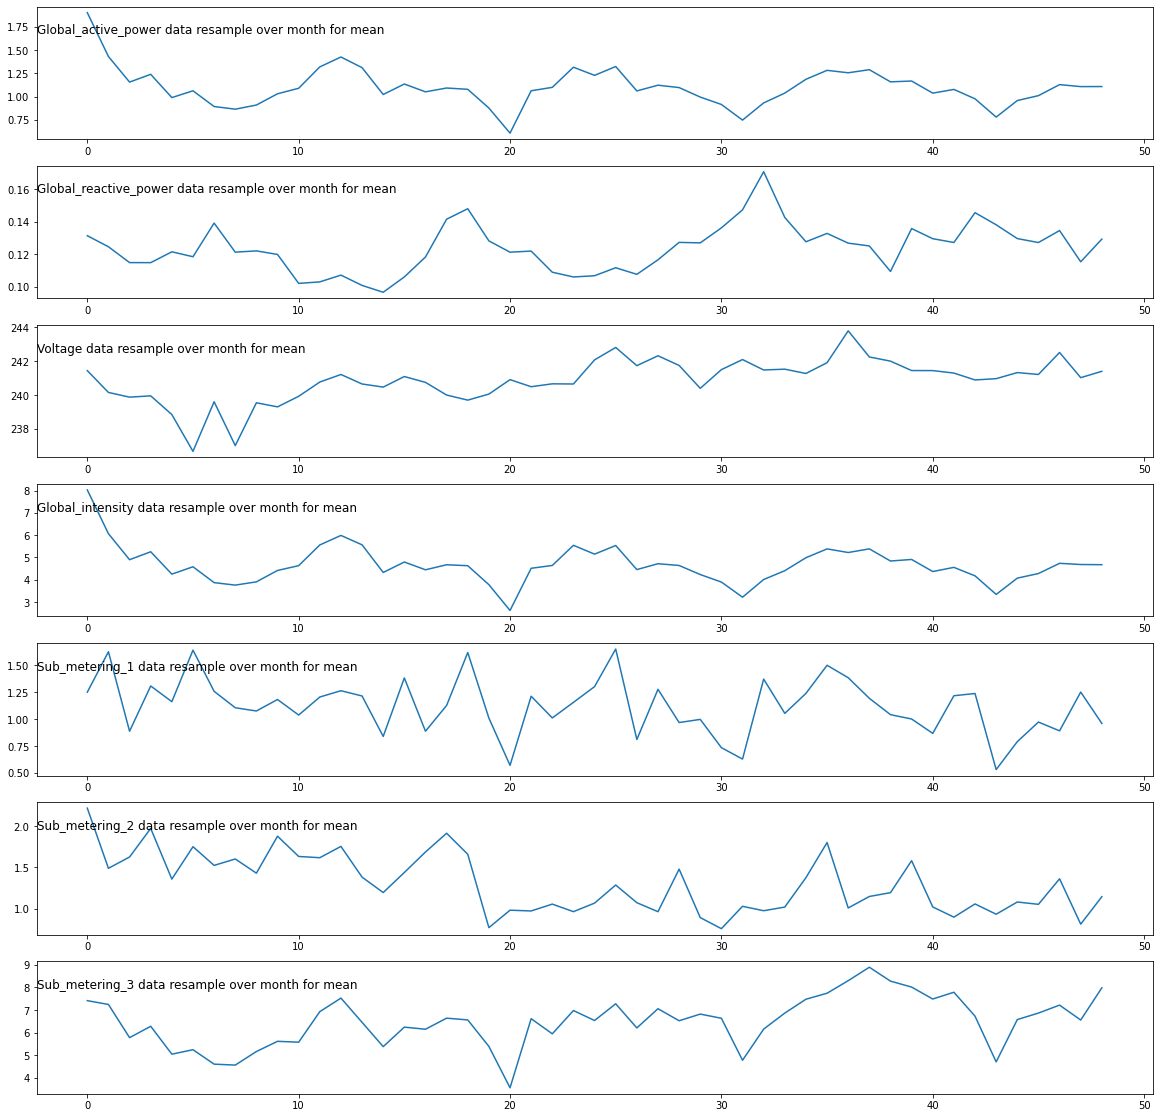

In [15]:
i = 1
cols=[0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(20, 20))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(data.resample('M').mean().values[:, col])
    plt.title(data.columns[col] + ' data resample over month for mean', y=0.75, loc='left')
    i += 1
plt.show()

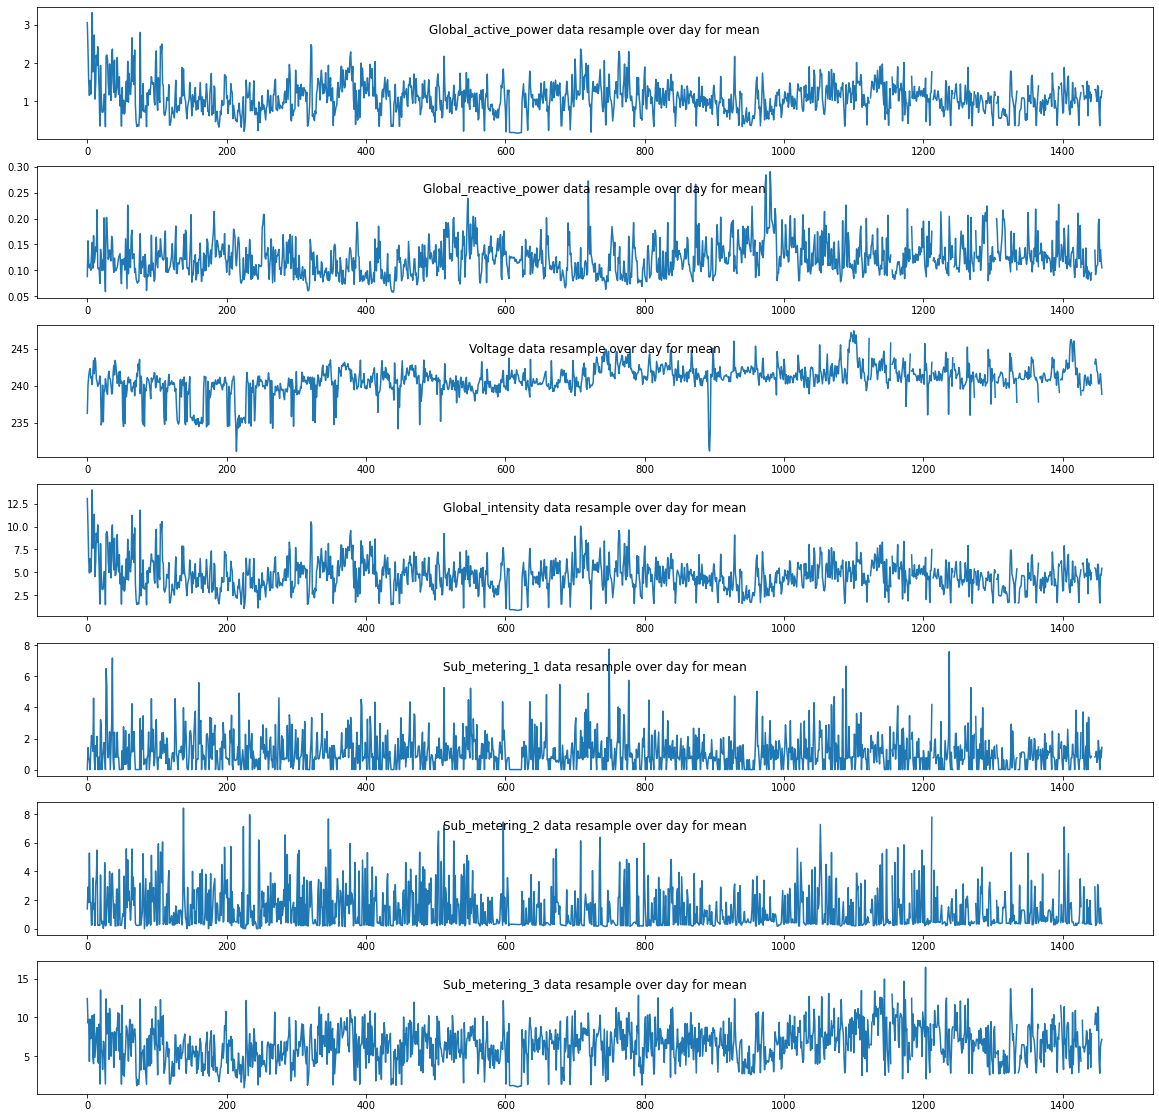

In [16]:
i = 1
cols=[0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(20, 20))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(data.resample('D').mean().values[:, col])
    plt.title(data.columns[col] + ' data resample over day for mean', y=0.75, loc='center')
    i += 1
plt.show()

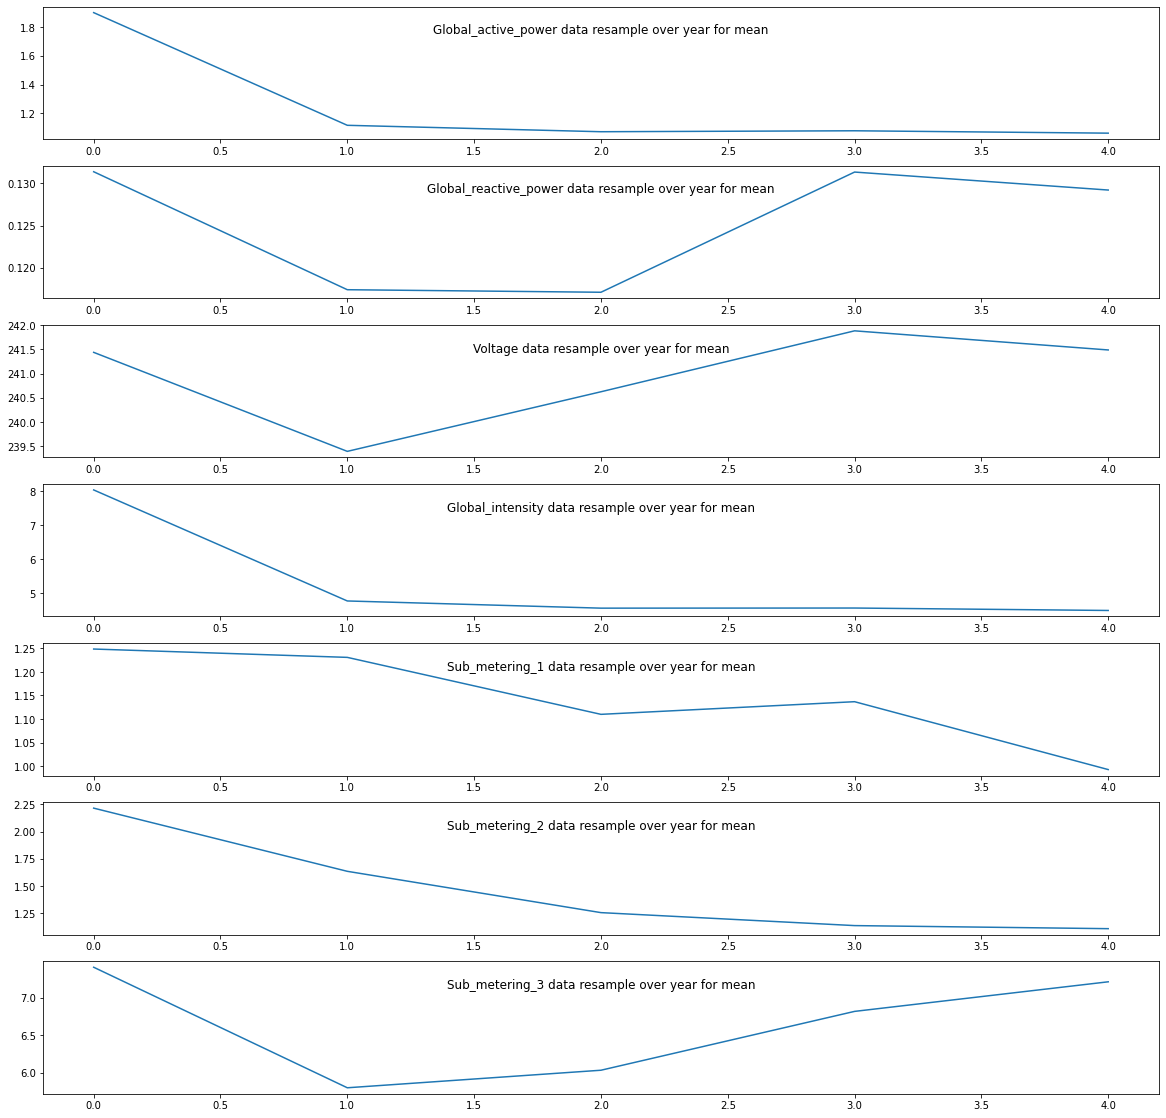

In [17]:
i = 1
cols=[0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(20, 20))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(data.resample('Y').mean().values[:, col])
    plt.title(data.columns[col] + ' data resample over year for mean', y=0.75, loc='center')
    i += 1
plt.show()

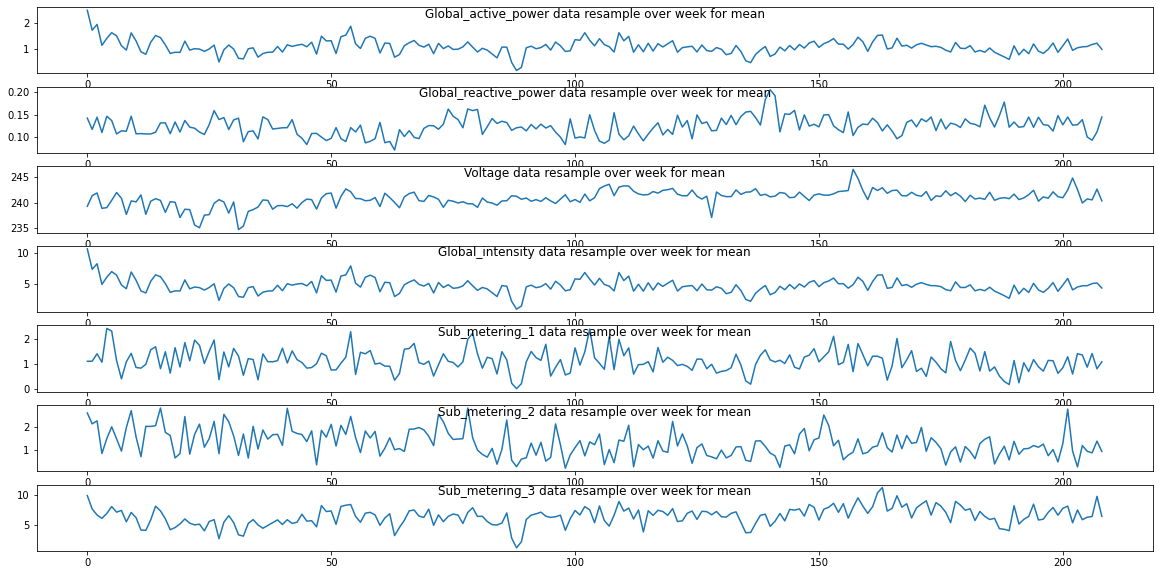

In [18]:
i = 1
cols=[0, 1, 2, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(data.resample('W').mean().values[:, col])
    plt.title(data.columns[col] + ' data resample over week for mean', y=0.75, loc='center')
    i += 1
plt.show()

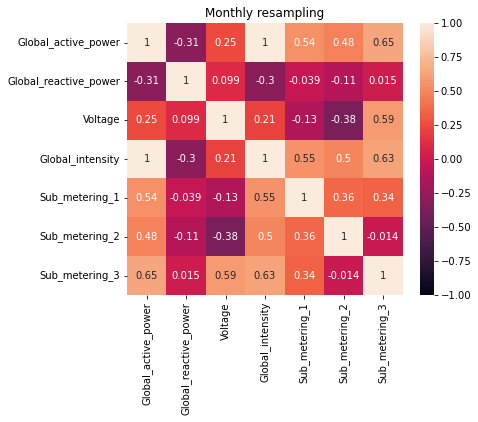

In [19]:
import seaborn as sns
f= plt.figure(figsize=(21,5))

ax=f.add_subplot(131)
dfm = sortdatam
sns.heatmap(dfm.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Monthly resampling', size=12)
plt.show()

Text(0.5, 1.0, 'Daily resampling')

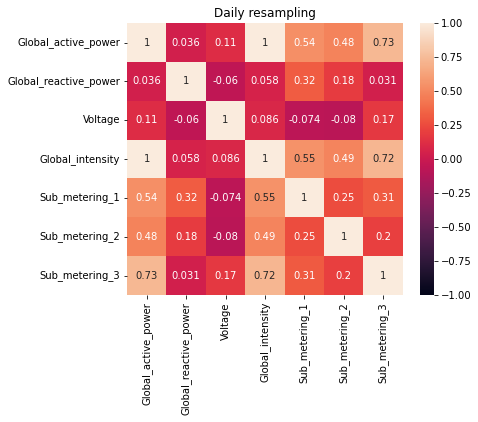

In [20]:
f= plt.figure(figsize=(21,5))
ax=f.add_subplot(132)
dfd = sortdatad
sns.heatmap(dfd.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Daily resampling', size=12)

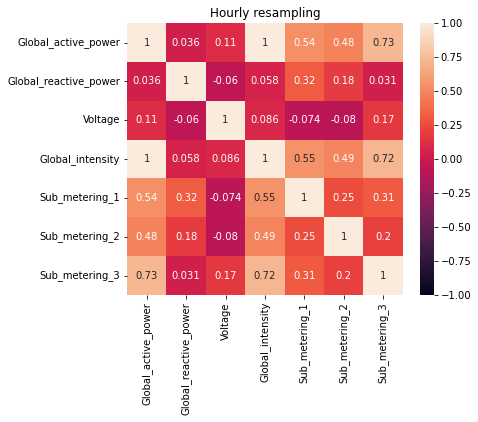

In [21]:
f= plt.figure(figsize=(21,5))
ax=f.add_subplot(133)
dfh = data.resample('H').mean()
sns.heatmap(dfh.corr(), vmin=-1, vmax=1, annot=True)
plt.title('Hourly resampling', size=12)
plt.show()